# Author - Sridev T T
# Data Science and Business Analytics Intern
# GRIP @ The Sparks Foundation
# Batch - April 2024
**Task-1 Predict the percentage of a student based on the number of study hours.**

#Simple Linear Regression
In this note book we will build a linear regression model to predict score using an appropriate predictor variable.
#Reading and understanding the data
1.Importing data using the pandas library. Also some relevent libraries.    
2.Understanding the structure of the data.  

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# load the daata from url using read_csv
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [4]:
# display the first 5 rows of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Let's inspect the various aspects of our dataframe

In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# describe() provides statistical measures such as count, mean, standard deviation, minimum, quartiles, and maximum values for each numeric column in the DataFrame.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.isnull().sum()  # this will check the null values in the dataset

Hours     0
Scores    0
dtype: int64

In [9]:
df.duplicated().sum() # To check for duplicate values

0

#Visualising the Data

Text(0.5, 1.0, 'Hours vs Scores')

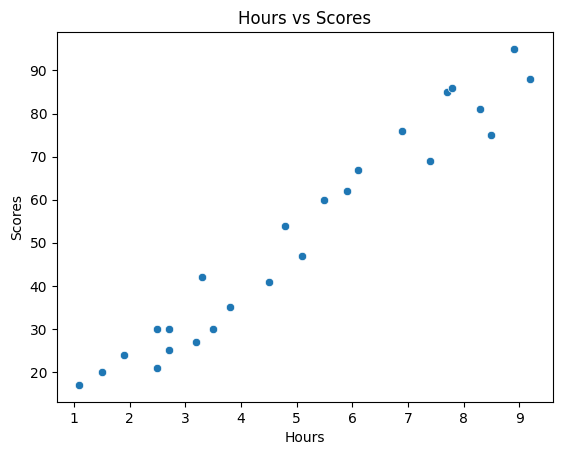

In [15]:
sns.scatterplot(data=df, x='Hours', y='Scores')
plt.title('Hours vs Scores')

{'whiskers': [<matplotlib.lines.Line2D at 0x7d6625ae7280>,
 'caps': [<matplotlib.lines.Line2D at 0x7d6625ae74c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d6625ae6fb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d6625ae66e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d6625ae4370>],
 'means': []}

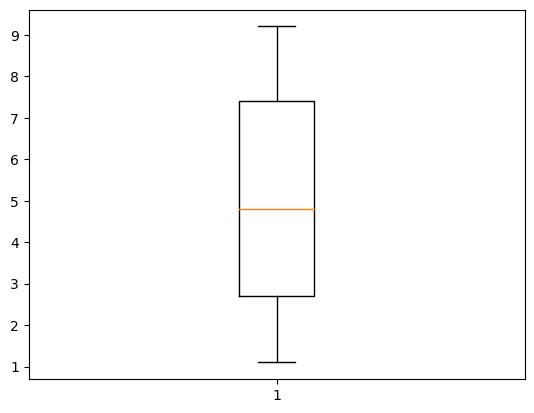

In [19]:
plt.boxplot(df["Hours"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d6624e43ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d6625f648e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d6624e402b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d6625f66da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d6625f65900>],
 'means': []}

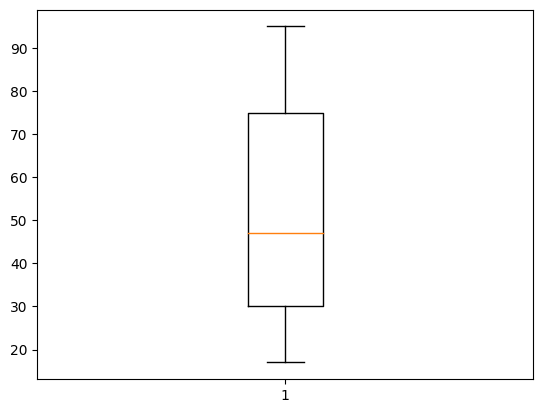

In [20]:
plt.boxplot(df["Scores"])

In [21]:
df.corr() # lets find the correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**We can see that our data have no outliers**

#Linear Regression using linear_model in `sklearn`
Package namely sklearn that can be used to perform linear regression. We will use the linear_model library from sklearn to build the model.

In [22]:
x = df.Hours
y = df.Scores

In [23]:
# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
# Create a linear regression model
reg = LinearRegression()

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. It assumes that the relationship between the variables can be approximated by a linear function.  
1. Dependent variable (Y): This is the variable you want to predict or explain. It's also called the target variable.  
2. Independent variable(s) (X): These are the variables that you believe have an influence on the dependent variable. They are also called predictor variables.  
3. Linear function: In its simplest form, a linear function is represented as:  
Y=β
0
​
 +β
1
​
 X
1
​
 +β
2
​
 X
2
​
 +...+β
n
​
 X
n
​
 +ϵ


In [25]:
# Fit the model on the training data
reg.fit(np.array(x_train).reshape(-1, 1), y_train)

LinearRegression()

#Plotting the regression line

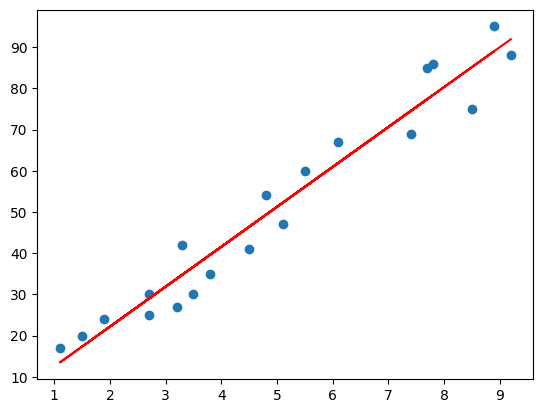

In [26]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.intercept_ + reg.coef_ * x_train, 'r')
plt.show()

In [30]:
# Evaluate the model on the testing data
y_pred = reg.predict(np.array(x_test).reshape(-1,1))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Squared Error: 18.943211722315272
Mean absolute Error: 3.9207511902099244


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

In [28]:
# Comparing Actual vs Predicted
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [22]:
predicted_score = reg.predict([[9.25]])
print("Predicted Score for 9.25 hours:", predicted_score[0])

Predicted Score for 9.25 hours: 92.38611528261494


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 92.38 marks.**